# Single cell adaptive spike and oscillations
### 1. Overview
In this section we are going to explore different models's ability to reproduce the bifurcation behavior of single *Dictyostelium* cells. Specifically, as the concentration for cAMP step input is increased, single cell response changes from an adaptive spike to sustained oscillations (below). With this notebook, you can play with different $cAMP_{e}$ inputs and compare the simulated responses ($cAMP_{i}$) produced by different models.
![Figure](imgs/single_cell_adaptive_oscillation.png)
<h10><center>Single cell adaptive spiking and oscillations.</center></h10>

#### Let's start by importing packages and setting up time scaling parameters

In [1]:
import os
import numpy as np
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline  
from scipy import signal
from scipy.signal import chirp, find_peaks, peak_widths
import pandas as pd
import scipy.io

os.chdir("../compare_models")
from Gregor2010_agent_and_pop_FUN import  Gregor2010_agent
from Sgro2015_agent_and_pop_FUN import Sgro2015_agent
from Goldbeter1987_agent_and_pop_FUN import Goldbeter1987_agent_3var
from MaedaLoomis2004_agent_and_pop_FUN import MaedaLoomis2004_agent
from Kamino2017_agent_and_pop_FUN import Kamino2017_agent 
from NB_SC_functions import plot_SC_spike_oscillation
# Normalization parameters
from Params import NormParams
for key,val in NormParams.items():
        exec(key + '=val')
os.chdir("../Notebooks") 

### 2. Experimental data 
#### import and plot experimental data

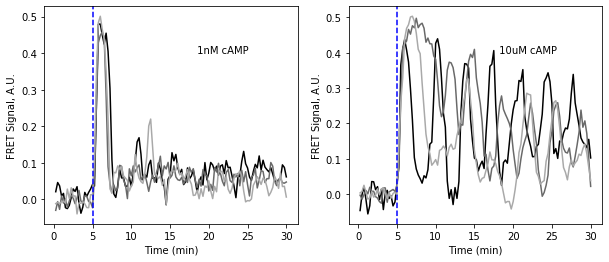

In [2]:
# my_dir = r'C:/Users/ellin/Dropbox/AACP Science/Dicty model review drafts/figures/'
Sgro2015Figure1excel = pd.read_excel(r'../exp_data/Sgro2015DataFormattedforPython.xlsx',sheet_name='Figure1')

fig = plt.figure(figsize=(10, 4))
grid = plt.GridSpec(1,2)
ax1= fig.add_subplot(grid[0, 0])
ax1.plot(Sgro2015Figure1excel["Time (min)"],Sgro2015Figure1excel["Cell 1 FRET Trace (1nM)"],color='k')
ax1.plot(Sgro2015Figure1excel["Time (min)"],Sgro2015Figure1excel["Cell 2 FRET Trace (1nM)"],color='dimgrey')
ax1.plot(Sgro2015Figure1excel["Time (min)"],Sgro2015Figure1excel["Cell 3 FRET Trace (1nM)"],color='darkgrey')
ax1.axvline(x=5, ls='--',color = 'b')
ax1.set_ylabel(r'FRET Signal, A.U.'); ax1.set_xlabel('Time (min)')
ax1.text(0.7,0.8,' 1nM cAMP', ha='center',va='center',transform = ax1.transAxes)
ax2= fig.add_subplot(grid[0,1])
ax2.plot(Sgro2015Figure1excel["Time (min)"],Sgro2015Figure1excel["Cell 1 FRET Trace (10uM)"],color='k')
ax2.plot(Sgro2015Figure1excel["Time (min)"],Sgro2015Figure1excel["Cell 2 FRET Trace (10uM)"],color='dimgrey')
ax2.plot(Sgro2015Figure1excel["Time (min)"],Sgro2015Figure1excel["Cell 3 FRET Trace (10uM)"],color='darkgrey')
ax2.axvline(x=5, ls='--',color = 'b')
ax2.set_ylabel(r'FRET Signal, A.U.'); ax2.set_xlabel('Time (min)')
ax2.text(0.7,0.8,' 10uM cAMP', ha='center',va='center',transform = ax2.transAxes)
plt.show()

### 3. Receptor desensitization
#### Set up parameters (from Table II in [Matiel & Goldbeter 1987](https://www.sciencedirect.com/science/article/pii/S0006349587832757?via%3Dihub) )

In [3]:
from NB_SC_functions import  Goldbeter1986_SC
from Params import Goldbeter3AgentParam

dt=0.001; t_tot=6*Nt_Goldbeter; t=list(np.arange(0,t_tot,dt))

#### Define step input trace

In [4]:
step_signal=1 # ow cAMPe input
# step_signal=10000 # high cAMPe input
stim_time_step=int(round(1/6*t_tot/dt)) # at this time step step input is applied
signal_trace=np.zeros(len(t))
signal_trace[stim_time_step:] = step_signal

#### Get $cAMP_i$ simulation response

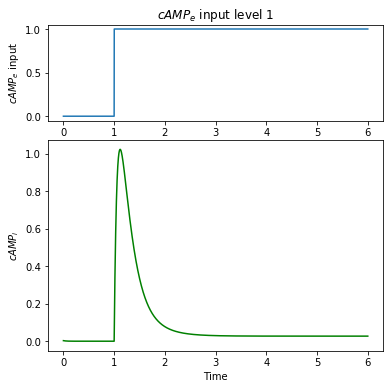

In [5]:
[t_plot_Goldbeter, b_trace, p_trace] = Goldbeter1986_SC(Goldbeter3AgentParam,dt,t,signal_trace)
t_plot_Goldbeter = t_plot_Goldbeter /(Nt_Goldbeter)

# Normalize height of cAMPi response trace to 1
b_trace = b_trace/Nh_Goldbeter
plot_SC_spike_oscillation(t_plot_Goldbeter,signal_trace,b_trace,step_signal)


### 4. CDINFB
#### Set up parameters (from supplementary in [Maeda et al. 2004](https://science.sciencemag.org/content/304/5672/875/tab-figures-data) )

In [6]:
from NB_SC_functions import Maeda2004_SC
from Params import MaedaAgentParam
dt=0.001; t_tot=6*Nt_Maeda; t=list(np.arange(0,t_tot,dt))

#### Define step input trace

In [7]:
step_signal=1 # low cAMPe input
# step_signal=10000 # high cAMPe input
stim_time_step=int(round(1/6*t_tot/dt)) # at this time step input is applied
signal_trace=np.zeros(len(t))
signal_trace[stim_time_step:] = step_signal

#### Get $cAMP_i$ simulation response

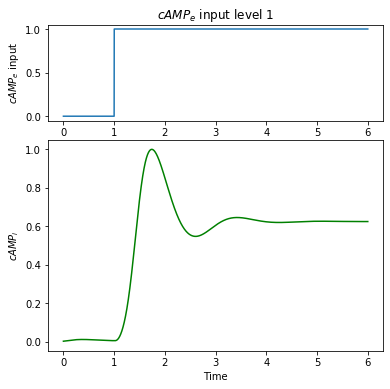

In [8]:
[t_plot_Maeda, cAMPi_trace, ERK2_trace] = Maeda2004_SC(MaedaAgentParam,dt,t,signal_trace)
t_plot_Maeda = np.array(t)/(Nt_Maeda)

# Normalize height of cAMPi response trace to 1
cAMPi_trace = cAMPi_trace/Nh_Maeda
plot_SC_spike_oscillation(t_plot_Maeda,signal_trace,cAMPi_trace,step_signal)

### 5. Phase oscillator
#### Set up parameters

In [9]:
from NB_SC_functions import Gregor2010_SC
from Params import GregorAgentParam
Amax=20;  Abas=0.4 # uM
dt=0.001; t_tot=6*Nt_Gregor; t=list(np.arange(0,t_tot,dt))

#### Define step input trace

In [10]:
step_signal=1e-6 # low cAMPe input
# step_signal=1e-2# high cAMPe input
stim_time_step=int(round(1/6*t_tot/dt)) # at this time step input is applied
signal_trace=np.zeros(len(t))
signal_trace[stim_time_step:] = step_signal

#### Get $cAMP_i$ simulation response

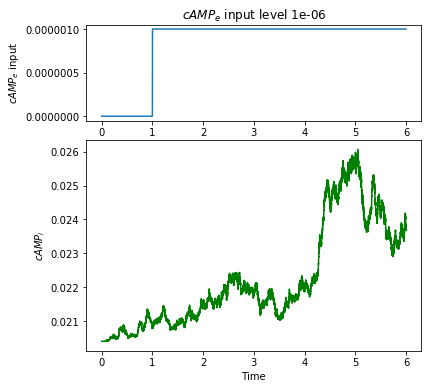

In [11]:
[t_plot_Gregor, gregor_thetai_trace, gregor_campCyto_trace] = Gregor2010_SC(GregorAgentParam,dt,t,signal_trace)
t_plot_Gregor =t_plot_Gregor/(Nt_Gregor)

gregor_campCyto_trace=gregor_campCyto_trace/Nh_Gregor

plot_SC_spike_oscillation(t_plot_Gregor,signal_trace,gregor_campCyto_trace,step_signal)


### 6. IPNFB 
#### Set up parameters

In [12]:
from Params import SgroAgentParam
from NB_SC_functions import Sgro2015_SC
dt=0.001 ; t_tot=6*Nt_Sgro; t=list(np.arange(0,t_tot,dt))

#### Define step input trace

In [13]:
step_signal=1 # low cAMPe input
# step_signal=10000 # high cAMPe input
stim_time_step=int(round(1/6*t_tot/dt)) # at this time step input is applied
signal_trace=np.zeros(len(t))
signal_trace[stim_time_step:] = step_signal

#### Get $cAMP_i$ simulation response

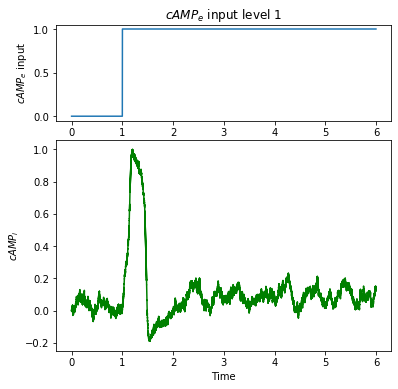

In [14]:
[t_plot_Sgro,  A_trace_orig,R_trace_orig] = Sgro2015_SC(SgroAgentParam,dt,t,signal_trace)
t_plot_Sgro = t_plot_Sgro/(Nt_Sgro)

# Normalize height of cAMPi response trace to 1
A_trace_plot = (A_trace_orig - Nh_Sgro_offset)/Nh_Sgro
plot_SC_spike_oscillation(t_plot_Sgro,signal_trace, A_trace_plot,step_signal)


### 7. IFFL
#### Set up parameters

In [15]:
from Params import KaminoAgentParam
from NB_SC_functions import Kamino2017_SC
dt=0.001; t_tot=6*Nt_Kamino; t=list(np.arange(0,t_tot,dt))

#### Define step input trace

In [16]:
step_signal=1 # low cAMPe input
# step_signal=10000 # high cAMPe input
stim_time_step=int(round(1/6*t_tot/dt)) # at this time step input is applied
signal_trace=np.zeros(len(t))
signal_trace[stim_time_step:] = step_signal

#### Get $cAMP_i$ simulation response

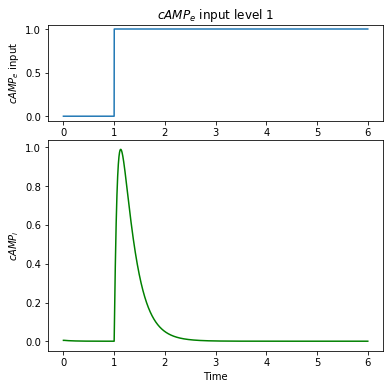

In [17]:
[t_plot_Kamino, y_trace, x_trace] = Kamino2017_SC(KaminoAgentParam,dt,t,signal_trace)
t_plot_Kamino = t_plot_Kamino/Nt_Kamino

# Normalize height of cAMPi response trace to 1
y_trace = (y_trace- Nh_Kamino_offset)/Nh_Kamino
plot_SC_spike_oscillation(t_plot_Kamino,signal_trace, y_trace,step_signal)
